#### 1-Project Definition
#### 2-Prepare Dataset
#### 3-Explore Data
#### 4-Find Model
#### 5-Experiments with different models & Select More accurated model
#### 6-Hyperparameter Tuning
#### 7-Evaluation
#### 8-Conclusion

### 1 - Project Definition

##### Our project is find the best model for predict heart disease or not

### 2 - Prepare Dataset

In [129]:

#### Import required liberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Load Our Dataset

In [130]:
dataset = pd.read_csv("diabetes.csv")
dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [131]:
dataset.shape

(768, 9)

In [132]:
# Check  Missing Values

dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [133]:
### We have no missing values
## But we can see 0 values in insulin,skinthickness......

## So we convert 0 to median or mean

In [134]:
dataset['Glucose'] = dataset['Glucose'].replace(0, dataset['Glucose'].median())  
  
# Filling 0 values of Blood Pressure  
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0, dataset['BloodPressure'].median())   
  
# Replacing 0 values in BMI  
dataset['BMI'] = dataset['BMI'].replace(0, dataset['BMI'].mean())  
  
# Replacing the missing values of Insulin and SkinThickness  
dataset['SkinThickness'] = dataset['SkinThickness'].replace(0, dataset['SkinThickness'].mean())  
dataset['Insulin'] = dataset['Insulin'].replace(0, dataset['Insulin'].mean())  

In [135]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1


In [136]:
##standerdize

from sklearn.preprocessing import QuantileTransformer  

In [137]:
# Transforming the data into quartiles  
quartile  = QuantileTransformer()  
x = quartile.fit_transform(dataset)  
dataset_new = quartile.transform(x)  
dataset_new = pd.DataFrame(x)  
dataset_new.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']  

dataset_new.head()

c:\Users\L123\Desktop\ML\Projects\Heart\env\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\L123\Desktop\ML\Projects\Heart\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.494133,0.801825,0.380052,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.644720,0.380052,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.308996,0.380052,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.505867,0.662973,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


### 3 - Explore Data

In [138]:
## Check How many people have disease

dataset_new["Outcome"].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [139]:
### Here we can understand 268 people have disease 

In [140]:
### Find coorelation

dataset_new.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120002,0.176386,0.012087,-0.000419,-0.010885,-0.044036,0.594451,0.188575
Glucose,0.120002,1.000000,0.242583,0.142260,0.415095,0.225729,0.090555,0.280688,0.481353
BloodPressure,0.176386,0.242583,1.000000,0.127817,-0.000770,0.289794,0.009716,0.364894,0.170792
SkinThickness,0.012087,0.142260,0.127817,1.000000,0.277132,0.557048,0.131988,0.078380,0.177751
Insulin,-0.000419,0.415095,-0.000770,0.277132,1.000000,0.220698,0.146532,0.067687,0.212100
BMI,-0.010885,0.225729,0.289794,0.557048,0.220698,1.000000,0.134913,0.124162,0.307504
DiabetesPedigreeFunction,-0.044036,0.090555,0.009716,0.131988,0.146532,0.134913,1.000000,0.042819,0.175334
Age,0.594451,0.280688,0.364894,0.078380,0.067687,0.124162,0.042819,1.000000,0.309685
Outcome,0.188575,0.481353,0.170792,0.177751,0.212100,0.307504,0.175334,0.309685,1.000000


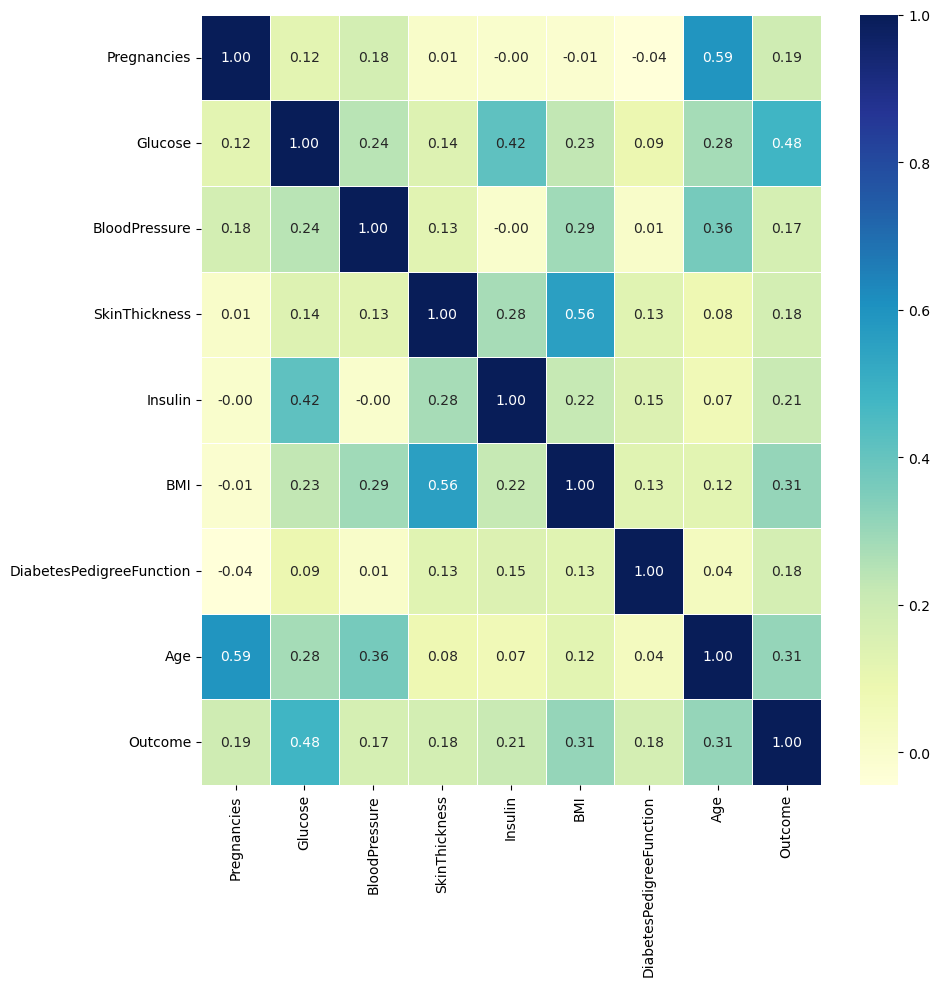

In [141]:
### For More Readable

corr_matrix = dataset_new.corr()
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

### 4-Find Model


Our problem is classification related, so we try diiferent models in classification type

In [142]:
### In Our assignment we only collect Age,Blood sugar,Blood pressure and insulin from user
### so we split data

In [143]:
dataset_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.494133,0.801825,0.380052,0.591265,0.750978,0.889831,1.0
1,0.232725,0.091265,0.290091,0.644720,0.380052,0.213168,0.475880,0.558670,0.0
2,0.863755,0.956975,0.233377,0.308996,0.380052,0.077575,0.782269,0.585398,1.0
3,0.232725,0.124511,0.290091,0.505867,0.662973,0.284224,0.106258,0.000000,0.0
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


In [144]:
z=dataset_new.iloc[:,[1,2,4,7,8]].values

In [145]:
## First split data

x = dataset_new.iloc[:,[1, 2,4 , 7]].values
y= dataset_new.iloc[:,8].values


x

array([[0.81029987, 0.49413299, 0.38005215, 0.88983051],
       [0.09126467, 0.29009126, 0.38005215, 0.55867014],
       [0.95697523, 0.23337679, 0.38005215, 0.58539765],
       ...,
       [0.54954368, 0.49413299, 0.71186441, 0.52933507],
       [0.61994785, 0.13559322, 0.38005215, 0.86701434],
       [0.17079531, 0.40547588, 0.38005215, 0.20013038]])

In [146]:

y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [147]:
df = pd.DataFrame(z)
df.columns =['Glucose', 'BloodPressure', 'Insulin',  'Age', 'Outcome']  

df.head()

,Glucose,BloodPressure,Insulin,Age,Outcome
0,0.810300,0.494133,0.380052,0.889831,1.0
1,0.091265,0.290091,0.380052,0.558670,0.0
2,0.956975,0.233377,0.380052,0.585398,1.0
3,0.124511,0.290091,0.662973,0.000000,0.0
4,0.721643,0.005215,0.834420,0.606258,1.0


In [148]:
### Train Test Split

from sklearn.model_selection import train_test_split
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [149]:
### Here we split data into two parts
## 80% data for training and 20% for testing

In [150]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((614, 4), (614,), (154, 4), (154,))

###  5-Experiments with different models & Select More accurated model

#### Our Problem is classification type

##### So we use the following models
##### 1-Logistic Regression
##### 2-K-Nearest Neigbor
##### 3-Random Forest Classification
##### 4-SVC

In [151]:
### We Find Best Model Using Loop
### Import models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [152]:
### We Create a dictionary

models = {
    "LogisticRegression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier(),
 
}

def fit_model(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score={}

    ### Loop

    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name]=model.score(x_test,y_test)
    return model_score

model_score=fit_model(
    models=models,
    x_train=x_train,
    x_test=x_test,
    y_train=y_train,
    y_test=y_test
)
model_score

{'LogisticRegression': 0.7662337662337663,
 'KNN': 0.7142857142857143,
 'Random Forest': 0.7272727272727273}

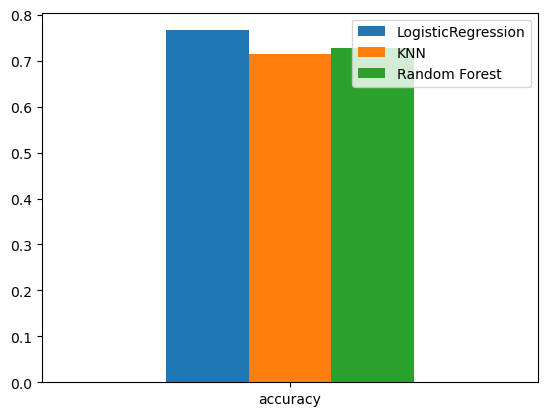

In [153]:
## Lets plot our score

model_compare=pd.DataFrame(model_score,index=["accuracy"])
model_compare.plot.bar()
plt.xticks(rotation=0);

In [154]:
###logistic regression and random forest classification are more better than KNN
###so we tune logistic & random forest classifier for more accuracy

### 6-Hyperparameter Tuning

##### RandomizedSearchCv

In [155]:
## First we use Randomized Cv
from sklearn.model_selection import RandomizedSearchCV

In [156]:
#### first we select logistic regression for tuning

log_reg = {
    'C' : np.logspace(-4,4,20),
    'solver':["liblinear"]
}

### c & solver are parameter of logistic regression

np.random.seed(42)

rc_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rc_log_reg.fit(x_train,y_train)
rc_log_reg.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.7662337662337663

In [157]:
rc_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [158]:
### We got little improvement

In [159]:
###Now tuning Random Forest Classifier
rf_cl ={
    'n_estimators':np.arange(10,1000,5),
    'max_depth':[None,3,5,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
} 


rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_cl,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 1...
       530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590,
       595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655,
       660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720,
       725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785,
       790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850,
       855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915,
       920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980,
       985, 990, 995])},
                   verbose=True)

In [160]:
rf_grid.score(x_test,y_test)

0.7597402597402597

In [161]:
rf_grid.best_params_

{'n_estimators': 545,
 'min_samples_split': 16,
 'min_samples_leaf': 13,
 'max_depth': None}

#### GridSearchCv

In [162]:
#Now Tune with Grid Search Cv
from sklearn.model_selection import GridSearchCV

In [163]:
#### try with logistic regression

log_grid = {
    'C':np.logspace(-4,4,20),
    'solver':["liblinear"]
}
log_grid_cv=GridSearchCV(
    LogisticRegression(),
    param_grid=log_grid,
    cv=5,
    verbose=True

    
)
log_grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [164]:
log_grid_cv.score(x_test,y_test)

0.7662337662337663

In [165]:
#### This is best score

In [166]:
log_grid_cv.best_params_

{'C': 78.47599703514607, 'solver': 'liblinear'}

In [167]:

svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [168]:
svc.score(x_test, y_test)

0.7597402597402597

### 7-Evaluation

#### Evaluate our models with


* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [169]:
#Load liberies

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [170]:
y_preds = log_grid_cv.predict(x_test)
y_preds

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0.])

In [171]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0.])

In [172]:
print(confusion_matrix(y_test,y_preds))

[[85 14]
 [22 33]]


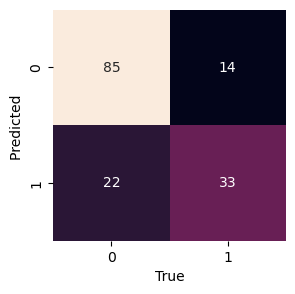

In [173]:
### For better view
def plot_conf_mat(y_test, y_preds):
   
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True")
    plt.ylabel("Predicted ")
    
    
plot_conf_mat(y_test, y_preds)

In [174]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83        99
         1.0       0.70      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



In [175]:
from sklearn.model_selection import cross_val_score


In [176]:
log_grid_cv.best_params_

{'C': 78.47599703514607, 'solver': 'liblinear'}

In [177]:
clf = LogisticRegression(
    C= 78.47599703514607,
    solver='liblinear'
)

cv_accuracy = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_accuracy

array([0.74025974, 0.68831169, 0.75324675, 0.77777778, 0.78431373])

In [178]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.7487819370172311

In [179]:
cv_precison = cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_precison = np.mean(cv_precison)
cv_precison

0.6608925648819266

In [180]:
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.5824598183088749

In [181]:
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.6184893883949993

<Axes: title={'center': 'CV Metrics'}>

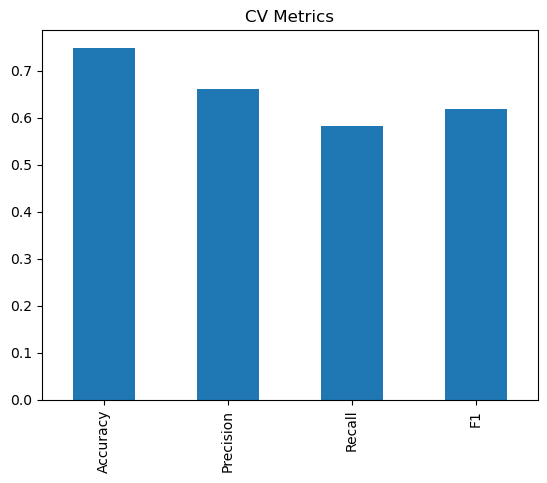

In [182]:
cv_metrics = pd.DataFrame({
    'Accuracy':cv_accuracy,
    'Precision' : cv_precison,
    'Recall':cv_recall,
    "F1":cv_f1},
    index=[0]
)
cv_metrics.T.plot(kind='bar',title="CV Metrics",legend=False)

In [183]:
clf.fit(x_train,y_train)
clf.coef_

array([[ 3.68448707, -0.09272311,  0.47438615,  2.15898685]])

#### Feature Importance

In [184]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Glucose': 3.6844870745961678,
 'BloodPressure': -0.09272310555814772,
 'Insulin': 0.474386145657937,
 'Age': 2.158986851395538}

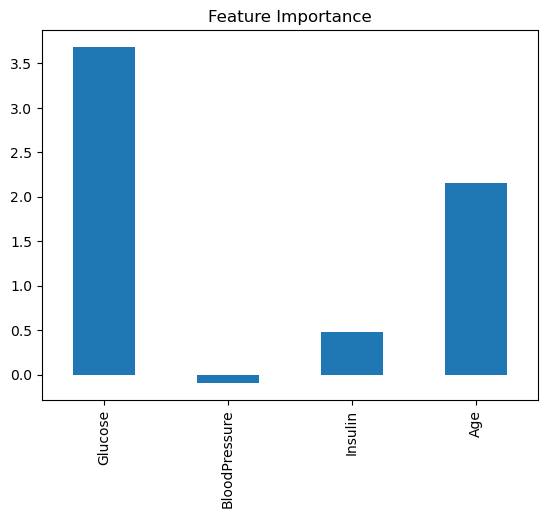

In [185]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

#### Save Our Model

In [186]:



from joblib import load,dump
dump(clf,filename='Diabetes-model.joblib')

['Diabetes-model.joblib']

#### Prediction Diabetes or Not from input

In [187]:
input_data = (183,64,79,32)  

### change into numpy array
input_numpy = np.asarray(input_data)
# input_numpy.shape
input_numpy
#convert shape of array,we predict only one instance
reshaped_array = input_numpy.reshape(1,-1)
#  reshaped_array
prediction = clf.predict(reshaped_array)
# prediction
if prediction[0]==0:
    print("No Disease")
else:
    print("Diabetes Found")

Diabetes Found


#### 8-Conclutions

Our aim is find best model for predict Diabetes
our project answer should be yes/no ,so we can understand that its classification model


first step is check any missing values
then we explore the dataset.There are 8 parameters depending our target variable
but we need only 4 parameters



next step is select best model
we know its a classification problem, so select the following models

    * Logistic Regression 
    * K-Nearest Neighbours Classifier
    * Random Forest Classifier

after training,testing,fitting data set, Logistic & Random forest classification have better score than KNN

Then we try to improve our models using hyperparameter tuning by Randomized Search Cv and Grid Search Cv

Grid Search Cv give more accuracy in Random forest classifier from 72% to 75%,still logistic regression has more accuracy than Random forest classifier

so we can understand that Logistic Regression model is best fit for this project

then we evaluated our tuned model with the following 

    * Confusion matrix
    * Classification report
    * Precision
    * Recall
    * F1-score

then we again did it with the help of cross validation & best params

finally we got which features contributed most to the outcome of the model
 